In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [62]:
import sys,os
from glob import glob
sys.path.append('../scripts/')
import warnings

import numpy as np
import pandas as pd
import xarray as xr
from dask import delayed

from scipy.stats import pearsonr

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.xarray

from epsilon_tools import *
from tools import alphabet

# set up figure params
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1.2)
mpl.rc('figure', dpi=100, figsize=[11, 5])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

warnings.simplefilter('ignore')

In [70]:
def exists(path):
    try:
        return os.path.getsize(path)>0
    except:
        return False

In [85]:
ds = xr.open_dataset('../data/niw2017/combined/7785b.nc')

In [98]:
da =convert_ctddata('../data/niw2017/7780b/ema-7780b-0175-ctd.mat')

In [99]:
da

<xarray.Dataset>
Dimensions:  (time: 36)
Coordinates:
  * time     (time) datetime64[ns] 2017-08-28T18:25:27 ... 2017-08-28T18:37:15
    z        (time) float64 -9.011 -11.88 -14.71 -17.71 ... -95.77 -98.46 -100.6
Data variables:
    T        (time) float64 23.5 23.5 23.5 23.5 ... 13.66 13.43 13.33 13.23
    S        (time) float64 34.16 34.17 34.18 34.18 ... 34.47 34.45 34.45 34.44
    p        (time) float64 9.011 11.88 14.71 17.71 ... 92.68 95.77 98.46 100.6
    sigma    (time) float64 1.023e+03 1.023e+03 ... 1.026e+03 1.026e+03
    w        (time) float64 -0.1435 -0.1463 -0.1495 ... -0.1411 -0.1415 -0.1413
    N2       (time) float64 1.558e-05 1.44e-05 1.287e-05 ... 6.94e-05 7.067e-05
    dTdz     (time) float64 -0.001361 -0.000502 0.0003356 ... 0.0433 0.04883

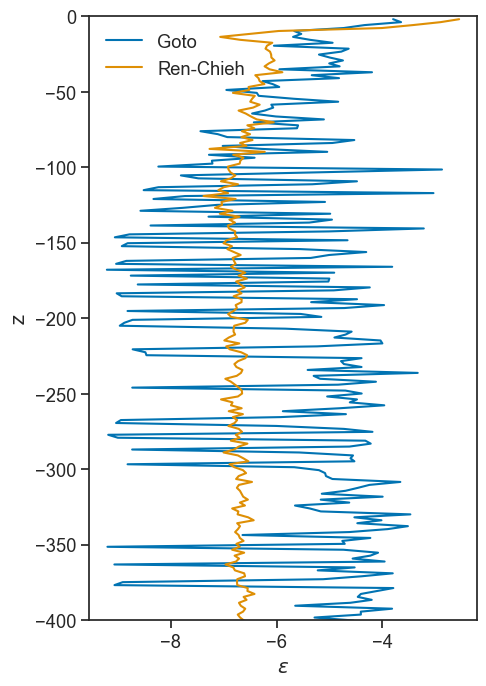

In [91]:
plt.figure(figsize=(5,8))
ds.mean('starttime').pipe(np.log10).eps1_kra.plot(y='z',label='Goto')
ds.mean('starttime').pipe(np.log10).eps_rc.plot(y='z',label='Ren-Chieh')
plt.ylim(-400,0)
plt.xlabel(r'$\epsilon$')
plt.legend()

(-200, 0)

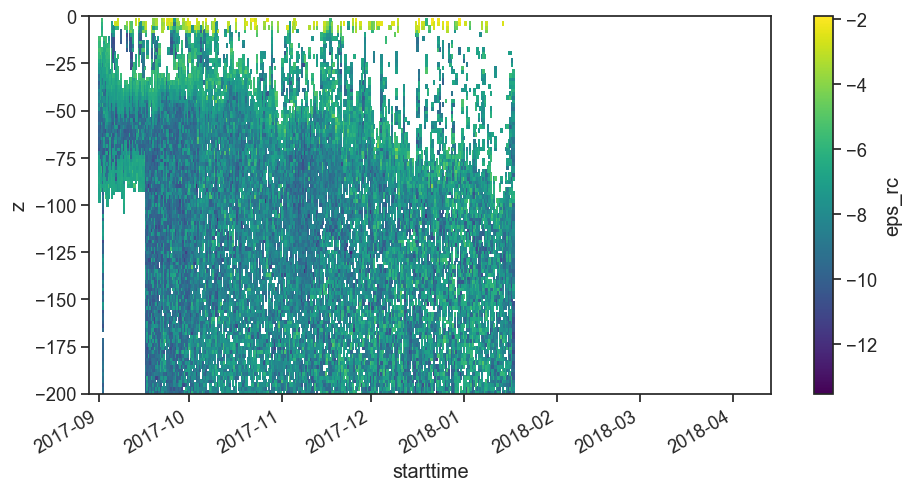

In [87]:
ds.sortby('starttime').pipe(np.log10).eps_rc.plot(rasterized=True)
plt.ylim(-200,0)

(-200, 0)

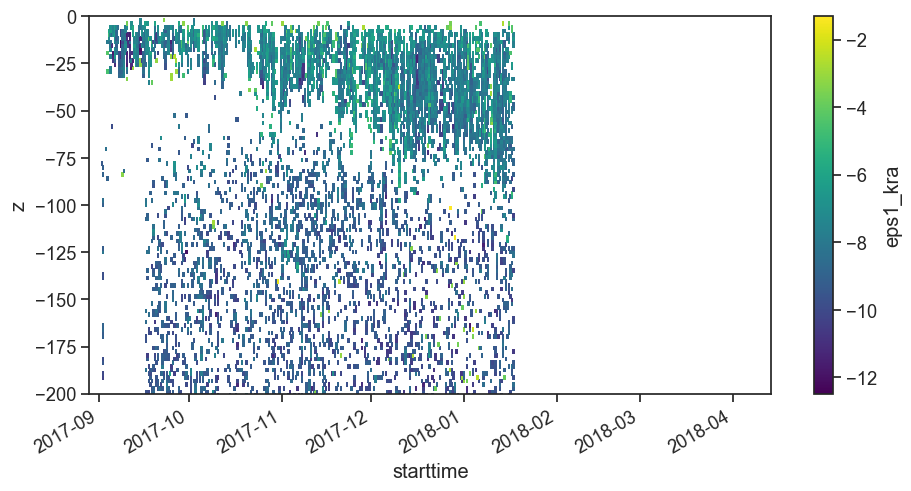

In [88]:
ds.sortby('starttime').pipe(np.log10).eps1_kra.plot(rasterized=True)
plt.ylim(-200,0)